Notebook créé le 04/10/19 par Tupac (tupac@metriq.io)

## Import

In [4]:
# Imports
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# On récupère les dataframes
%run dataframes.ipynb

# Étude des anomalies

# Etude des pics
L'idée est de repérer les périodes de pic, où il y a le plus grand écart par rapport à la moyenne

Nous avons essayé plusieurs types de calculs:
* ecartAbs: Le maximum de la valeur absolue de la différence avec la moyenne
* ecartRel: ecartAbs divisé par la moyenne
* ecartSqrt: Pour avoir un entre-deux des précédents, on pondère ecartAbs par la racine de la moyenne

In [7]:
# Construction d'un df contenant les différents types écarts de chaque thème
def ecarts_df_f(count_df):
    ecarts = []
    for theme in themes:
        vecteur = count_df[theme].values
        moyenne = np.mean(vecteur)
        ecartAbs = max(vecteur-moyenne)
        ecartRel = ecartAbs/moyenne
        ecartSqrt = ecartAbs/np.sqrt(moyenne)
        ecarts.append({
            "theme":theme,
            "vecteur":vecteur,
            "moyenne": moyenne,
            "ecartAbs" : ecartAbs,
            "ecartRel" : ecartRel,
            "ecartSqrt" : ecartSqrt
        })
    return pd.DataFrame(ecarts).set_index('theme')

In [8]:
# Ecarts obtenus avec les calculs par mois
ecarts_month = ecarts_df_f(count_df_month)
ecarts_month.sort_values(ascending = False,by='ecartSqrt').head(5)

,ecartAbs,ecartRel,ecartSqrt,moyenne,vecteur
theme,,,,,
chambres consulaires,40.321429,6.037433,15.602498,6.678571,"[0.0, 0.0, 1.0, 10.0, 1.0, 2.0, 3.0, 7.0, 0.0,..."
taxe sur la valeur ajoutée,40.892857,5.753769,15.339102,7.107143,"[1.0, 2.0, 3.0, 7.0, 5.0, 3.0, 11.0, 5.0, 5.0,..."
ministères et secrétariats d'État,26.428571,7.400000,13.984686,3.571429,"[0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ..."
eau et assainissement,34.071429,4.917526,12.944000,6.928571,"[0.0, 3.0, 5.0, 12.0, 13.0, 18.0, 5.0, 3.0, 7...."
élections et référendums,25.571429,5.774194,12.151312,4.428571,"[2.0, 1.0, 2.0, 4.0, 2.0, 3.0, 6.0, 1.0, 3.0, ..."


In [9]:
# Ecarts obtenus avec les calculs par semaine
ecarts_week = ecarts_df_f(count_df_week)
ecarts_week.sort_values(ascending = False,by='ecartSqrt').head(5)

,ecartAbs,ecartRel,ecartSqrt,moyenne,vecteur
theme,,,,,
ministères et secrétariats d'État,28.145299,32.930000,30.443796,0.854701,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
chambres consulaires,21.401709,13.390374,16.928582,1.598291,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
médecines alternatives,2.965812,86.750000,16.040081,0.034188,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aide aux victimes,4.897436,47.750000,15.292239,0.102564,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
immigration,12.341880,18.753247,15.213492,0.658120,"[0.0, 0.0, 1.0, 1.0, 4.0, 0.0, 5.0, 1.0, 0.0, ..."


In [10]:
# Nous prendrons par la suite le calcul par semaine:
ecarts = ecarts_week #ecarts_month
count_df = count_df_week #count_df_month

In [11]:
# On ordonne d'abord par ecartAbs
ecarts.sort_values(ascending = False,by='ecartAbs').head(5)

,ecartAbs,ecartRel,ecartSqrt,moyenne,vecteur
theme,,,,,
sécurité routière,30.350427,6.527574,14.075320,4.649573,"[0.0, 0.0, 2.0, 1.0, 4.0, 2.0, 0.0, 0.0, 0.0, ..."
ministères et secrétariats d'État,28.145299,32.930000,30.443796,0.854701,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
professions de santé,23.256410,2.386842,7.450462,9.743590,"[0.0, 1.0, 3.0, 7.0, 13.0, 11.0, 3.0, 1.0, 3.0..."
agriculture,22.948718,3.254545,8.642201,7.051282,"[1.0, 3.0, 3.0, 6.0, 8.0, 30.0, 9.0, 3.0, 3.0,..."
chambres consulaires,21.401709,13.390374,16.928582,1.598291,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


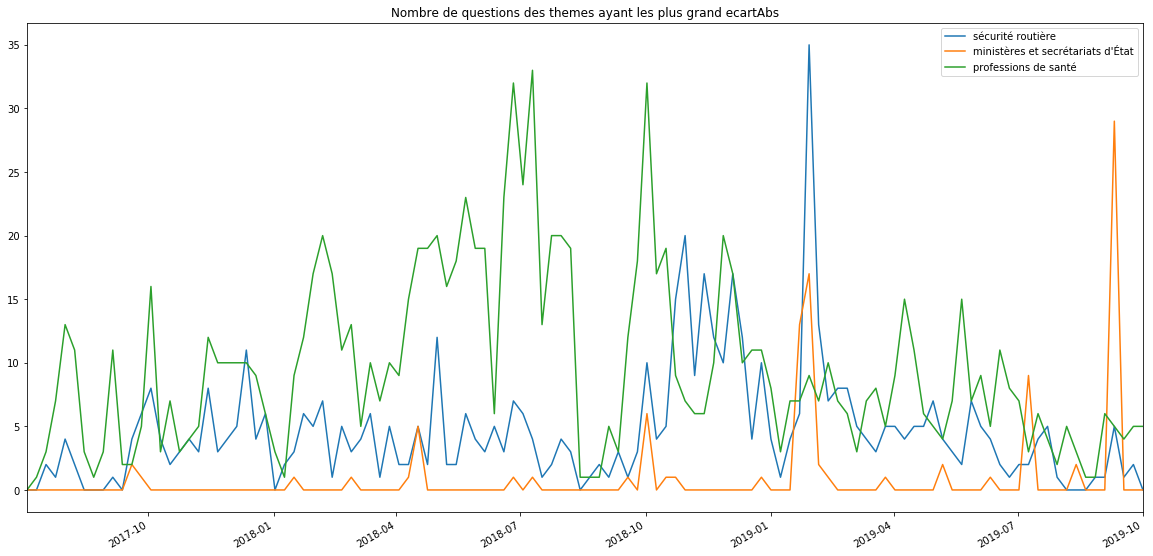

In [12]:
# Les themes correspondants aux meilleurs scores d'ecartAbs
themesEcartAbs = [theme for theme in ecarts_week.sort_values(ascending = False,by='ecartAbs').index]
count_df.plot(figsize = (20,10),title = 'Nombre de questions des themes ayant les plus grand ecartAbs',y = themesEcartAbs[:3])

In [13]:
# On passe aux écarts relatifs
ecarts.sort_values(ascending = False,by='ecartRel').head(5)

,ecartAbs,ecartRel,ecartSqrt,moyenne,vecteur
theme,,,,,
institutions sociales et médico sociales,0.991453,116.0,10.724204,0.008547,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
frontaliers,0.991453,116.0,10.724204,0.008547,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
grandes écoles,0.991453,116.0,10.724204,0.008547,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
nouvelles technologies,0.991453,116.0,10.724204,0.008547,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
partis et mouvements politiques,0.991453,116.0,10.724204,0.008547,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


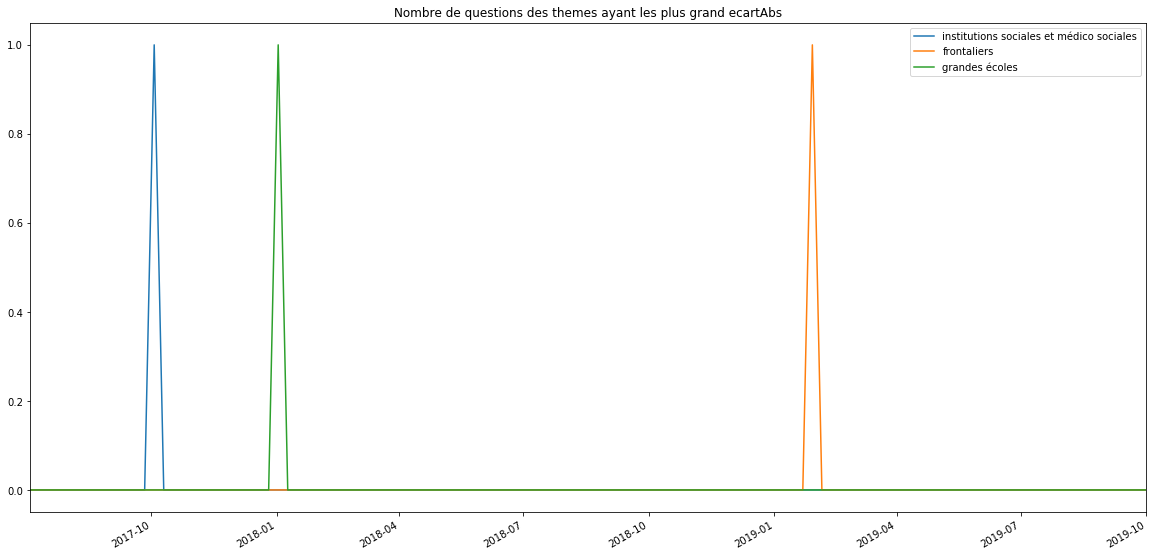

In [14]:
themesEcartRel = [theme for theme in ecarts.sort_values(ascending = False,by='ecartRel').head(3).index]
count_df.plot(figsize = (20,10),title = 'Nombre de questions des themes ayant les plus grand ecartAbs',y = themesEcartRel)

On remarque que ce ne sont que les themes qui ont été abordés une seule fois qui sont sélectionnés, ce qui ne nous intéresse pas. Essayons autre chose :/

### ecartSqrt

In [15]:
# On passe aux écarts racines
ecarts.sort_values(ascending = False,by='ecartSqrt').head(5)

,ecartAbs,ecartRel,ecartSqrt,moyenne,vecteur
theme,,,,,
ministères et secrétariats d'État,28.145299,32.930000,30.443796,0.854701,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
chambres consulaires,21.401709,13.390374,16.928582,1.598291,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
médecines alternatives,2.965812,86.750000,16.040081,0.034188,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aide aux victimes,4.897436,47.750000,15.292239,0.102564,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
immigration,12.341880,18.753247,15.213492,0.658120,"[0.0, 0.0, 1.0, 1.0, 4.0, 0.0, 5.0, 1.0, 0.0, ..."


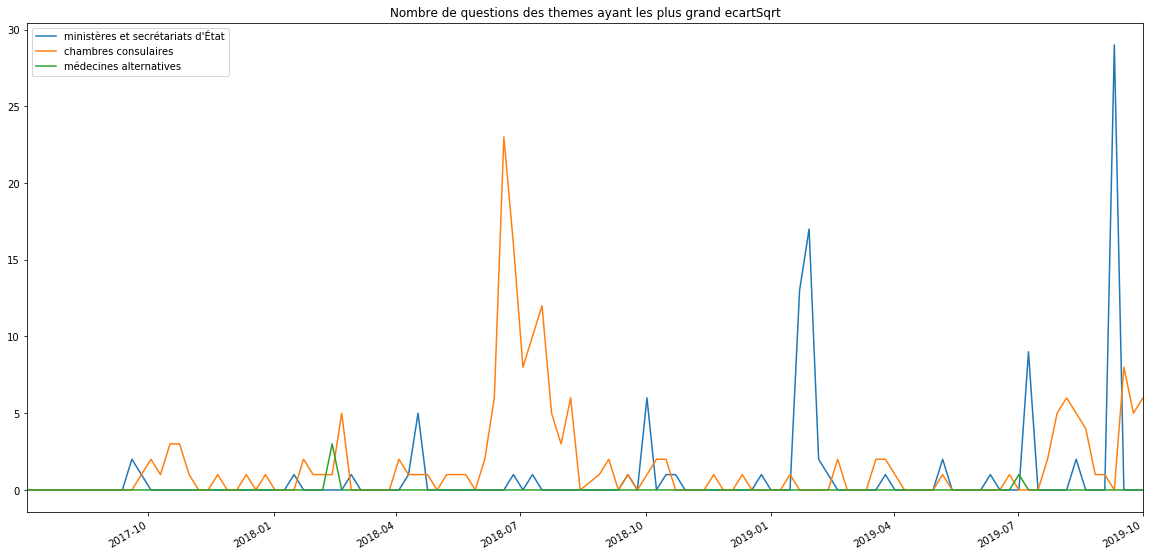

In [16]:
themesEcartSqrt = [theme for theme in ecarts.sort_values(ascending = False,by='ecartSqrt').index]
count_df.plot(figsize = (20,10),title = 'Nombre de questions des themes ayant les plus grand ecartSqrt',y = themesEcartSqrt[:3])

On remarque pour chaque courbes des pics prononcés à des mois précis, en nous pouvons donc en déduire que ce mode de détection semble assez pertinent. 

En revanche, nous avions observé la dernière fois qu'il y avait des tendances généralisées de pic ou de creux à certaines périodes, peut-être que pondérer les graphes par la moyenne de chaque mois pourrait être une solution pour éviter de suivre ce biais.

* Le problème des jours face aux mois
* Le problème de détection des périodes
* Assez étrangement,l'ecartSqrt est plus efficace en travaillant par mois 

# Fonctions utilisées

## Affichage

In [17]:
def show_count_df(themes_to_show, k = 4, c = 2, figsize = (20,12)):
    fig, axes = plt.subplots(ncols = c, nrows = k//c+k%c,figsize = figsize)
    for i in range(k):
        theme = themes_to_show[i]
        axe = axes[i//c,i%c]
        try:
            count_df.plot(y=theme,ax=axe)
        except Exception as e:
            print('Could\'nt print <',theme, '> because :', e)

## Les fonctions détectant les pics

In [18]:
# Détection du plus gros pic
def max_pic_date(theme):
    return count_df[theme].idxmax(axis=0)

In [19]:
# FONCTION A UTILISER
def pics_dates(theme, method = 'max'):
    if method == 'max':
        return [max_pic_date(theme)]

## Les fonctions détectant les périodes autour des pics
Méthode naïve : se situer au pic et prendre toute la période autour qui ne descend pas en dessous de la moyenne 

In [20]:
# Détection de la période correspondante à un pic

def pic_period_above_mean(theme,pic_date):
    pre_pic, post_pic = pic_date, pic_date
    m = ecarts['moyenne'][theme]
    dates_inf = count_df[count_df[theme]<m].index
    for i_date in range(len(dates_inf)):
        date = dates_inf[i_date]
        if date > pic_date:
            post_pic = date
            pre_pic = dates_inf[i_date-1]
            break
    print('Periode:',pre_pic,post_pic)
    return (pre_pic,post_pic)

In [21]:
# FONCTION A UTILISER
def pic_period(theme, pic_date, method = 'above_mean'):
    if method == 'above_mean':
        return pic_period_above_mean(theme,pic_date)

# Fonction repérage

In [22]:
def reperage_themes(m_meilleurs_themes = 'ecartSqrt', m_detect_pic = 'max', m_period_pic = 'above_mean', nb_to_show = 4, aleatoire  = False, show_figure = True, c = 2):
    # On prend nb_to_show thèmes aléatoires :
    if aleatoire:
        themes_to_show = [themes[i] for i in np.random.randint(len(themes),size = k)]
    # Ou bien les nb_to_show thèmes avec les meilleurs pics :
    else:
        themes_to_show = ecarts.sort_values(ascending = False,by=m_meilleurs_themes).head(nb_to_show).index
        
    # Affichage des figures obtenues:
    if show_figure:
        fig, axes = plt.subplots(ncols = c, nrows = nb_to_show//c+nb_to_show%c,figsize = (30,20))
        for i in range(nb_to_show):
            theme = themes_to_show[i]
            axe = axes[i//c,i%c]
            count_df.plot(y=theme,ax=axe)

            for date in pics_dates(theme,m_detect_pic):
                inf,sup = pic_period(theme,date,m_period_pic)
                try:
                    count_df[(count_df.index>=inf) & (count_df.index<=sup)].plot(y=theme,ax=axe)
                except Exception as e:
                    print('Could\'nt print <',theme, '> because :', e)
                    
    return ecarts.sort_values(ascending = False,by=m_meilleurs_themes).head(nb_to_show)[[m_meilleurs_themes,'moyenne']]

# Fonctions annexes

In [78]:
# Renvoie le df d'un theme asssociés à une période 

def df_periode(theme,periode,plot = True):
    mois = pd.Timedelta('30 days')
    debut, fin = periode
    if plot:
        ax = count_df[(count_df.index>=debut - mois) & (count_df.index<=fin + mois)].plot(y=theme,figsize = (12,5))
        count_df[(count_df.index>=debut) & (count_df.index<=fin)].plot(y=theme,ax = ax)
    return questions_df[(questions_df.date_question>=debut) & (questions_df.date_question<=fin) & (questions_df.rubrique == theme)].sort_values('date_question').set_index('date_question')

In [74]:
# Les groupes les plus présents
def ordre_groupes(data):
    return data.groupby('groupe_auteur').count().sort_values(by='question',ascending = False)[['question','date_reponse']]
# Les ministres les plus adressés
def ordre_ministres(data):
    return data.groupby('ministere_adresse').count().sort_values(by='question',ascending = False)[['question','date_reponse']]

# Exemple d'analyse de pic

Periode: 2019-09-03 00:00:00 2019-09-17 00:00:00
Periode: 2018-05-29 00:00:00 2018-08-14 00:00:00
Periode: 2018-02-06 00:00:00 2018-02-20 00:00:00
Periode: 2019-05-21 00:00:00 2019-06-11 00:00:00
Periode: 2019-06-18 00:00:00 2019-07-02 00:00:00
Periode: 2019-10-01 00:00:00 2017-07-18 00:00:00
Could'nt print < handicapés > because : Empty 'DataFrame': no numeric data to plot
Periode: 2018-09-18 00:00:00 2018-10-02 00:00:00
Periode: 2019-01-15 00:00:00 2019-03-12 00:00:00


,ecartSqrt,moyenne
theme,,
ministères et secrétariats d'État,30.443796,0.854701
chambres consulaires,16.928582,1.598291
médecines alternatives,16.040081,0.034188
aide aux victimes,15.292239,0.102564
immigration,15.213492,0.658120
handicapés,15.035570,0.068376
Gouvernement,14.108445,0.119658
sécurité routière,14.075320,4.649573


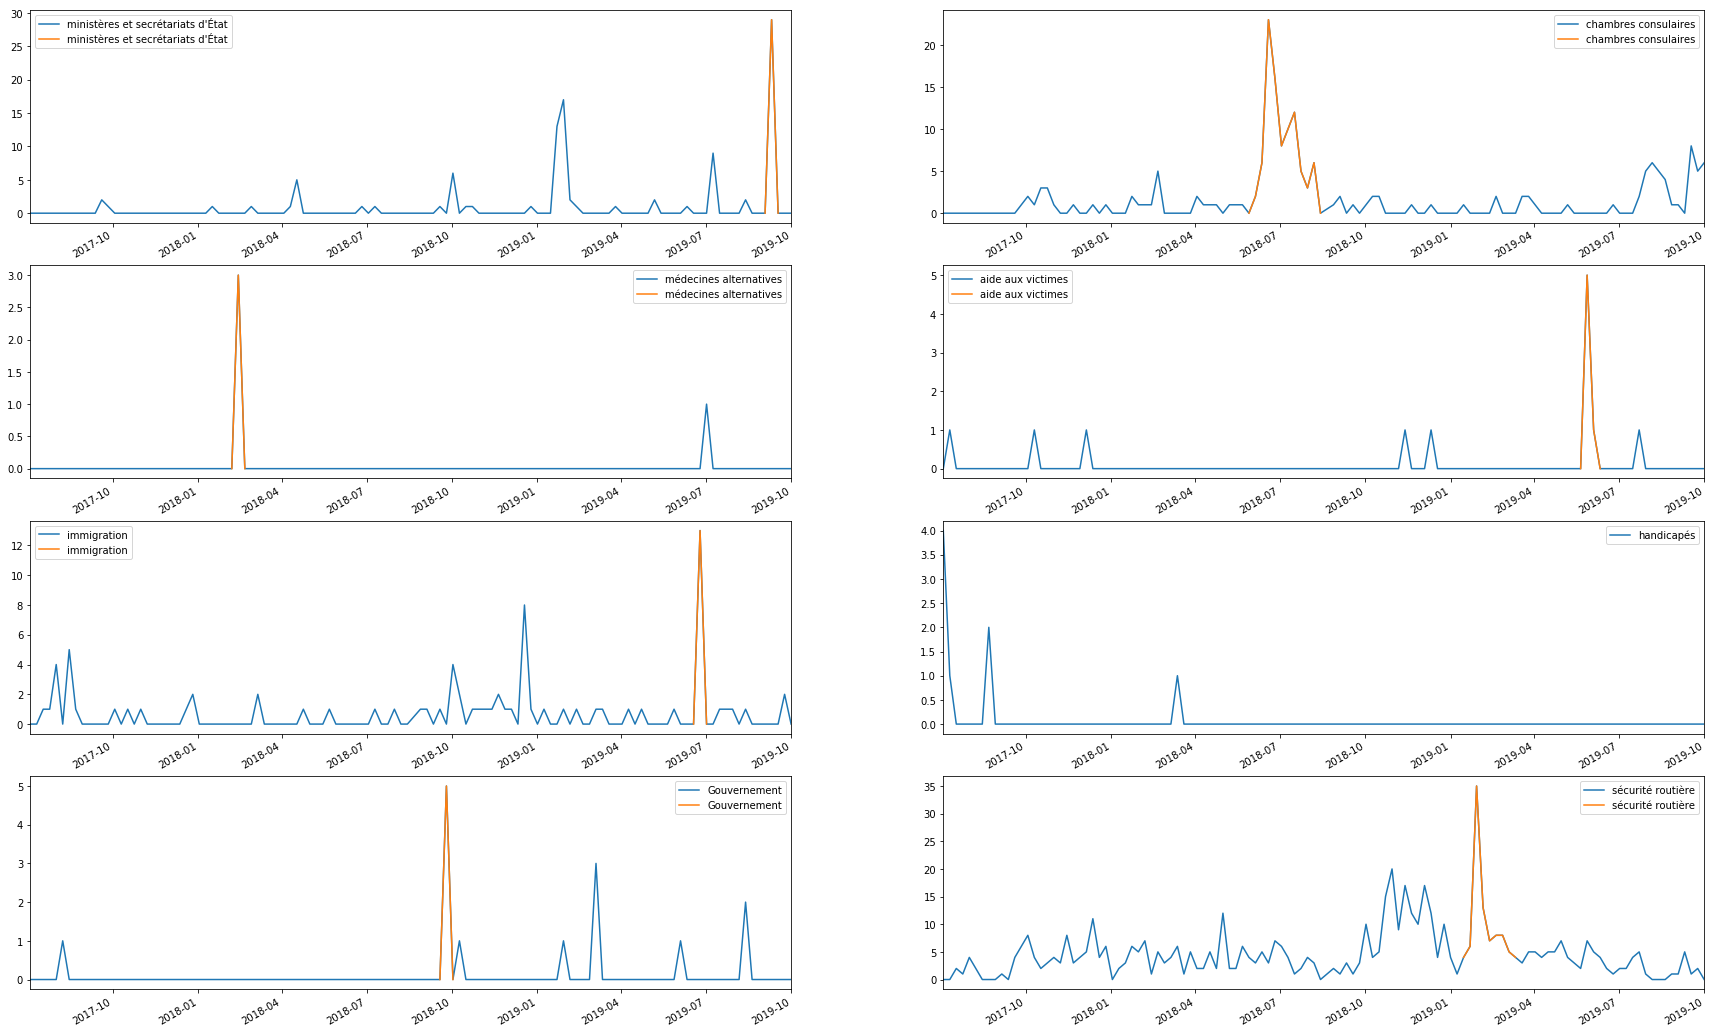

In [112]:
# On commence par repérer un thème et un pic qui nous intéresse
m_meilleurs_themes = 'ecartSqrt'
m_detect_pic = 'max'
m_period_pic = 'above_mean'
nb_to_show = 8
aleatoire  = False
show_figure = True
c = 2

reperage_themes(m_meilleurs_themes, m_detect_pic, m_period_pic, nb_to_show, aleatoire, show_figure, c)

In [55]:
# On choisit un thème qui parait intéressant
theme_choisi = 'sécurité routière'

In [56]:
# On affiche les différents pics de ce thème
dates_pics = pics_dates(theme_choisi, m_detect_pic)
for i in range(len(dates_pics)):
    print('Pic n°',i,'le',dates_pics[i].day,dates_pics[i].month,dates_pics[i].year)

Pic n° 0 le 29 1 2019


In [57]:
# On choisit un numéro de pic qui paraît intéressant
numero_choisi = 0

Periode: 2019-01-29 00:00:00 2019-02-05 00:00:00


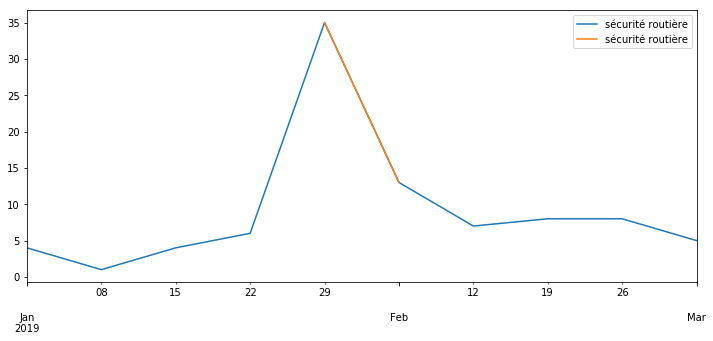

In [79]:
# On affiche les données de ce pic
data = df_periode(theme_choisi,pic_period(theme, dates_pics[numero_choisi], m_period_pic))

In [100]:
data.head(10)

,date_reponse,groupe_auteur,ministere_adresse,question,rubrique,titre
date_question,,,,,,
2019-01-29,2019-07-02,LAREM,Ministère de l'intérieur,M. Benoit Simian attire l'attention de M. le m...,sécurité routière,Passage au 80kmh
2019-01-29,2019-07-02,SOC,Ministère de l'intérieur,M. Alain David attire l'attention de M. le min...,sécurité routière,Évaluation 80km/h
2019-01-29,NaT,LAREM,Ministère de l'intérieur,Mme Caroline Abadie interroge M. le ministre d...,sécurité routière,Révision de l'âge légal du permis de conduire ...
2019-01-29,NaT,LR,Ministère de l'intérieur,M. Jérôme Nury attire l'attention de M. le min...,sécurité routière,Automobilistes et lacunes de Télépoints
2019-01-29,2019-03-26,LR,Ministère de l'intérieur,M. Patrice Verchère demande à M. le ministre d...,sécurité routière,Sécurité routière - Voitures-radars
2019-01-29,2019-03-26,LR,Ministère de l'intérieur,Mme Valérie Beauvais interroge M. le ministre ...,sécurité routière,Sécurité routière - Procès-verbal
2019-01-29,2019-07-02,LR,Ministère de l'intérieur,M. Éric Straumann attire l'attention de M. le ...,sécurité routière,Evaluation des 80 km/h
2019-01-29,2019-07-02,LR,Ministère de l'intérieur,M. Patrice Verchère attire l'attention de M. l...,sécurité routière,Sécurité routière - Bilan du passage à 80km/h
2019-01-29,2019-03-26,LR,Ministère de l'intérieur,M. Jean-Carles Grelier interroge M. le ministr...,sécurité routière,Bilan des voitures radars


In [85]:
ordre_groupes(data)

,question,date_reponse
groupe_auteur,,
LR,31,26
LAREM,8,6
UDI-A-I,4,3
SOC,3,2
LT,2,2


In [99]:
ordre_ministres(data)

,question,date_reponse
ministere_adresse,,
Ministère de l'intérieur,41,35
"Ministère auprès du ministre d'État, ministre de la transition écologique et solidaire, chargé des transports",5,3
Ministère de l'économie et des finances,1,0
Ministère de la transition écologique et solidaire,1,1


In [111]:
t = data[([('la nécessité d\'identifier clairement les effets du passage' in i) for i in data.question])]
ordre_groupes(t)

,question,date_reponse
groupe_auteur,,
LR,13,13
LAREM,3,3
SOC,2,1
UDI-A-I,1,1


In [52]:
#[i for i in t.question]

# Pics intéressants repérés
* aide aux victimes, 28 05 2019, LR, Représentation directe du ministre au conseil d'administration au FGTI
* ministères et secrétariats d\'État', 10 9 2019, LREM, Frais de représentation, même lettre
* chambres consulaires, 19 6 2018, _, CCI, baisse de budget critiqué
* immigration, 25 6 2019, FI,  Demandes d'asile des personnes LGBT, 30 fois la même question de la part de Obono
* sécurité routière, 29 1 2019, LR/LAREM/SOC/UDI, 80km, répétition de la même lettre sur 19 députés différents

# Fonction de lissage

In [114]:
def lissage(k,v):
    l = []
    n = 2*k+1
    for i in range(k):
        l.append(np.mean(v[:(i+k)]))
    for i in range(k,len(v)-k):
        l.append(np.mean(v[(i-k):(i+k)]))
    for i in range(len(v)-k,len(v)):
        l.append(np.mean(v[(len(v)-k):]))
    return l

In [163]:
v = count_df[themes[0]]
l = lissage(1,v)
a = range(len(v))

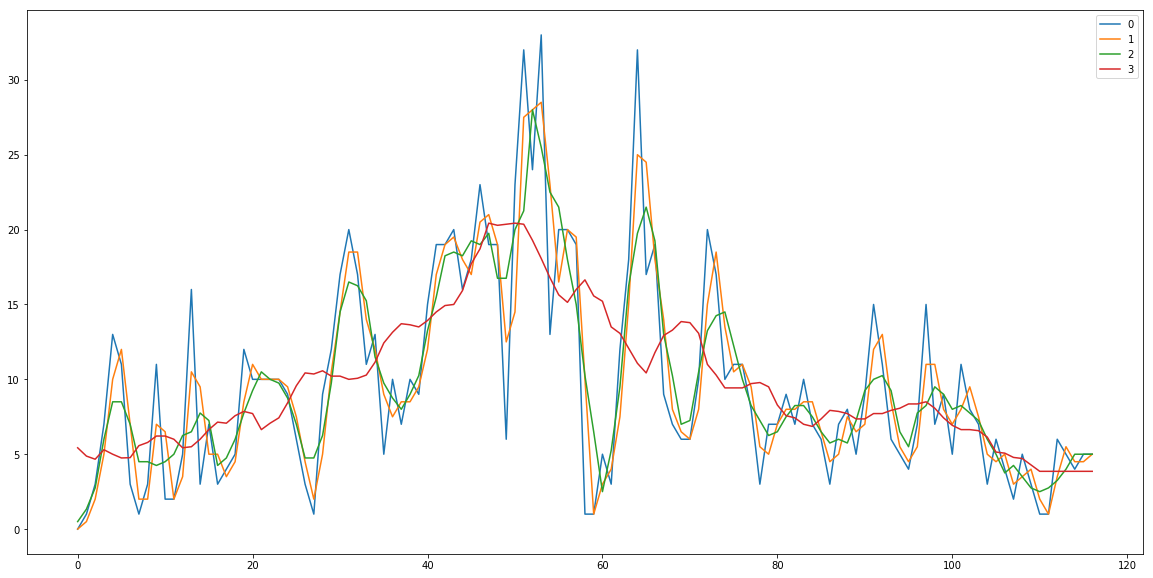

In [164]:
plt.figure(figsize=(20,10))
plt.plot(a,v,a,lissage(1,v),a,lissage(2,v),a,lissage(7,v))
plt.legend(['0','1','2','3'])

In [161]:
serie = count_df[themes[0]]
hist = []
for nb in range(int(serie.max())):
    hist.append(serie[serie <=nb].size)

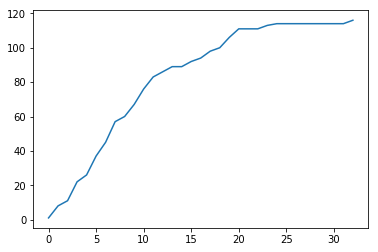

In [162]:
plt.plot(hist)

In [166]:
serie[serie>21]

2018-05-22    23.0
2018-06-19    23.0
2018-06-26    32.0
2018-07-03    24.0
2018-07-10    33.0
2018-10-02    32.0
Name: professions de santé, dtype: float64